<a href="https://colab.research.google.com/github/AmarShukla1/AmarShukla1/blob/main/AI_PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
files = [pd.read_csv('/content/drive/MyDrive/ecg_heartbeat_classfication/ptbdb_' + x + '.csv') for x in ['normal', 'abnormal']]
for file in files:
    file.columns = list(range(len(file.columns)))
data = pd.concat(files, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)  

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.887073,0.774146,0.713224,0.682021,0.699851,0.595840,0.552749,0.469539,0.481426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.684376,0.395907,0.288863,0.262102,0.231405,0.234160,0.218811,0.207399,0.212121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.645543,0.270195,0.089833,0.038997,0.064067,0.045265,0.062674,0.059192,0.057799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.995881,0.993821,0.959835,0.872297,0.542739,0.054583,0.000000,0.098867,0.156540,0.302781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.996020,0.323383,0.109453,0.035821,0.264677,0.342289,0.367164,0.402985,0.401990,0.420896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14545,1.000000,0.979786,0.621879,0.146849,0.000000,0.266944,0.356718,0.421522,0.450059,0.457788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14546,1.000000,0.648015,0.424677,0.315160,0.223816,0.156384,0.156863,0.122908,0.093735,0.122908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14547,0.931217,1.000000,0.465201,0.150183,0.035409,0.033374,0.049247,0.070818,0.078958,0.087505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,1.000000,0.588291,0.120570,0.056962,0.136076,0.181646,0.182595,0.185759,0.178481,0.186076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y = data[187].copy()
X = data.drop(187, axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
8540,1.000000,0.834705,0.358711,0.163923,0.096708,0.100137,0.137860,0.131001,0.131001,0.147462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10734,1.000000,0.783220,0.479365,0.206803,0.010884,0.078912,0.107937,0.113832,0.116553,0.113832,...,0.063492,0.070748,0.094785,0.142404,0.149206,0.155102,0.0,0.0,0.0,0.0
13652,1.000000,0.789198,0.247764,0.000000,0.039662,0.105148,0.115274,0.105654,0.109030,0.108017,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5014,1.000000,0.783092,0.592754,0.418357,0.347826,0.314976,0.289372,0.275362,0.267150,0.276812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11630,0.990495,0.670835,0.302151,0.000000,0.068534,0.074537,0.141571,0.253127,0.309155,0.310155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.000000,0.668866,0.334133,0.069586,0.106179,0.244151,0.262148,0.238152,0.240552,0.246551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5192,0.970892,0.406573,0.051643,0.065728,0.184038,0.205634,0.238498,0.227230,0.234742,0.271362,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
12172,1.000000,0.770696,0.600526,0.543364,0.500657,0.496058,0.500657,0.523653,0.519054,0.520368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
235,1.000000,0.814031,0.646993,0.079065,0.063474,0.122494,0.208241,0.231626,0.263920,0.279510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
y_train

8540     0.0
10734    0.0
13652    0.0
5014     1.0
11630    1.0
        ... 
905      1.0
5192     1.0
12172    1.0
235      1.0
13349    1.0
Name: Label, Length: 10185, dtype: float64

# **Logistic Regression**

In [18]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def fit(X, y, learning_rate=0.01, num_iterations=1000, fit_intercept=True):
    if fit_intercept:
        X = add_intercept(X)

    theta = np.zeros(X.shape[1])

    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= learning_rate * gradient
    
    return theta

def predict_probability(X, theta, fit_intercept=True):
    if fit_intercept:
        X = add_intercept(X)
    return sigmoid(np.dot(X, theta))

def predict(X, theta, threshold=0.5, fit_intercept=True):
    return predict_probability(X, theta, fit_intercept) >= threshold

theta=fit(X_train,y_train)
y_pred_prob = predict_probability(X, theta)
y_pred=predict(X_test,theta)


print('Precision: %.3f' % metrics.precision_score(y_test, y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test, y_pred))	
print('F1 Score: %.3f' % metrics.f1_score(y_test, y_pred))
print('accuracy %.3f' % metrics.accuracy_score(y_test,y_pred))

Precision: 0.719
Recall: 0.991
F1 Score: 0.833
accuracy 0.715


# **Naive Bayes**

In [21]:
np.seterr(divide='ignore', invalid='ignore')
def fit(X, y):
    classes = np.unique(y)
    n_classes = classes.shape[0]
    n_samples, n_features = X.shape
    mean = np.zeros((n_classes, n_features), dtype=np.float64)
    var = np.zeros((n_classes, n_features), dtype=np.float64)
    prior = np.zeros((n_classes), dtype=np.float64)
    
    for i, c in enumerate(classes):
        X_c = X[y == c]
        mean[i, :] = np.mean(X_c, axis=0)
        var[i, :] = np.var(X_c, axis=0)
        prior[i] = X_c.shape[0] / n_samples
        
    return mean, var, prior

def predict(X, mean, var, prior):
    n_samples, n_features = X.shape
    n_classes, _ = mean.shape
    posterior = np.zeros((n_samples, n_classes))
    
    for i in range(n_classes):
        posterior[:, i] = prior[i] * np.prod(1. / np.sqrt(2 * np.pi * var[i, :]) * np.exp(- (X - mean[i, :]) ** 2 / (2 * var[i, :])), axis=1)
        
    return np.argmax(posterior, axis=1)




mean, var, prior = fit(X_train, y_train)


predictions = predict(X_test, mean, var, prior)
print(predictions)
print('Precision: %.3f' % metrics.precision_score(y_test, predictions))
print('Recall: %.3f' % metrics.recall_score(y_test, predictions))	
print('F1 Score: %.3f' % metrics.f1_score(y_test, predictions))
print('accuracy %.3f' % metrics.accuracy_score(y_test,predictions))

[1 1 0 ... 1 1 1]
Precision: 0.887
Recall: 0.544
F1 Score: 0.675
accuracy 0.624


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print('Precision: %.3f' % metrics.precision_score(y_test, y_pred))
print('Recall: %.3f' % metrics.recall_score(y_test, y_pred))	
print('F1 Score: %.3f' % metrics.f1_score(y_test, y_pred))
print("Accuracy:", accuracy)

Precision: 0.937
Recall: 0.942
F1 Score: 0.940
Accuracy: 0.9131729667812142


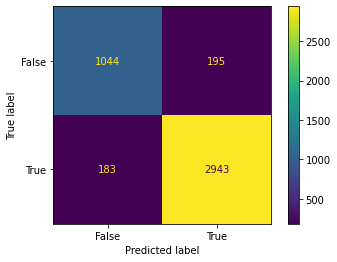

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# **Training by Neural Network**

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

hiddenlayer = tf.keras.layers.Dense(64, activation = 'relu')(inputs)
hiddenlayer2nd = tf.keras.layers.Dense(64, activation = 'relu')(hiddenlayer)
hiddenlayer3rd = tf.keras.layers.Dense(64, activation = 'relu')(hiddenlayer2nd)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hiddenlayer3rd)


NeuralNNmodel = tf.keras.Model(inputs=inputs, outputs=outputs)

print(NeuralNNmodel.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 187)]             0         
                                                                 
 dense (Dense)               (None, 64)                12032     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20,417
Trainable params: 20,417
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
NeuralNNmodel.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

NeuralNNmodel.fit(X_train,y_train,validation_split=0.2,batch_size=32,epochs=32)

Epoch 1/32
255/255 [==============================] - 2s 4ms/step - loss: 0.4382 - accuracy: 0.7802 - auc: 0.8344 - val_loss: 0.3548 - val_accuracy: 0.8287 - val_auc: 0.8962
Epoch 2/32
255/255 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8482 - auc: 0.9090 - val_loss: 0.3044 - val_accuracy: 0.8640 - val_auc: 0.9277
Epoch 3/32
255/255 [==============================] - 1s 3ms/step - loss: 0.2821 - accuracy: 0.8787 - auc: 0.9385 - val_loss: 0.2632 - val_accuracy: 0.8827 - val_auc: 0.9465
Epoch 4/32
255/255 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.8953 - auc: 0.9528 - val_loss: 0.2228 - val_accuracy: 0.9077 - val_auc: 0.9597
Epoch 5/32
255/255 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.9131 - auc: 0.9627 - val_loss: 0.2139 - val_accuracy: 0.9161 - val_auc: 0.9642
Epoch 6/32
255/255 [==============================] - 1s 3ms/step - loss: 0.1986 - accuracy: 0.9205 - auc: 0.9695 - val_loss: 0.19

In [ ]:
predictions = NeuralNNmodel.predict(X_test).round()
results = NeuralNNmodel.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("Test AUC: {:.4f}".format(results[2]))

137/137 [==============================] - 0s 1ms/step
Test Accuracy: 95.78%
Test AUC: 0.9852


In [ ]:
predictions


array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

Precision: 0.962
Recall: 0.976
F1 Score: 0.969


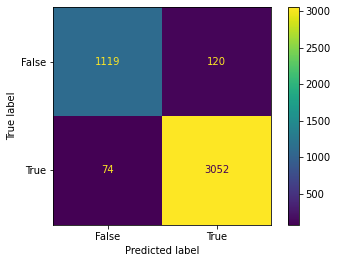

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print('Precision: %.3f' % metrics.precision_score(y_test, predictions))
print('Recall: %.3f' % metrics.recall_score(y_test, predictions))	
print('F1 Score: %.3f' % metrics.f1_score(y_test, predictions))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# **Training by Recurrent Neural Network**
As it is a timeseries data of heart signals that have some relation with previous state**

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

inputs = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(108,return_sequences=True)(inputs)


outputs = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(outputs)


RNNmodel = tf.keras.Model(inputs=inputs, outputs=outputs)

print(RNNmodel.summary())

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 187, 1)]          0         
                                                                 
 gru_6 (GRU)                 (None, 187, 108)          35964     
                                                                 
 flatten_12 (Flatten)        (None, 20196)             0         
                                                                 
 dense_18 (Dense)            (None, 1)                 20197     
                                                                 
Total params: 56,161
Trainable params: 56,161
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
RNNmodel.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = RNNmodel.fit(
    X_train,y_train,validation_split=0.2,batch_size=32,epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ])



Epoch 1/100
255/255 [==============================] - 33s 121ms/step - loss: 0.4647 - accuracy: 0.7683 - auc: 0.8092 - val_loss: 0.4244 - val_accuracy: 0.7904 - val_auc: 0.8441
Epoch 2/100
255/255 [==============================] - 31s 121ms/step - loss: 0.4196 - accuracy: 0.7974 - auc: 0.8544 - val_loss: 0.3849 - val_accuracy: 0.8287 - val_auc: 0.8801
Epoch 3/100
255/255 [==============================] - 31s 121ms/step - loss: 0.3872 - accuracy: 0.8206 - auc: 0.8786 - val_loss: 0.3634 - val_accuracy: 0.8414 - val_auc: 0.8939
Epoch 4/100
255/255 [==============================] - 31s 122ms/step - loss: 0.3475 - accuracy: 0.8381 - auc: 0.9041 - val_loss: 0.3527 - val_accuracy: 0.8282 - val_auc: 0.9098
Epoch 5/100
255/255 [==============================] - 31s 122ms/step - loss: 0.3170 - accuracy: 0.8603 - auc: 0.9214 - val_loss: 0.3060 - val_accuracy: 0.8832 - val_auc: 0.9265
Epoch 6/100
255/255 [==============================] - 31s 121ms/step - loss: 0.2724 - accuracy: 0.8837 - auc:

In [ ]:
RNNpredictions = RNNmodel.predict(X_test).round()
results = RNNmodel.evaluate(X_test, y_test, verbose=0)

137/137 [==============================] - 5s 31ms/step


Precision: 0.982
Recall: 0.984
F1 Score: 0.983


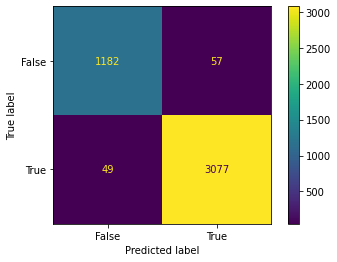

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, RNNpredictions)
print('Precision: %.3f' % metrics.precision_score(y_test, RNNpredictions))
print('Recall: %.3f' % metrics.recall_score(y_test, RNNpredictions))	
print('F1 Score: %.3f' % metrics.f1_score(y_test, RNNpredictions))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("Test AUC: {:.4f}".format(results[2]))

Test Accuracy: 97.57%
Test AUC: 0.9945
